# Lecture 6, Advanced Supervised Learning Techniques

## Decision Trees, Entropy, Gini Impurity, Information Gain

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Формулы для энтропии, Gini impurity и прироста информации

Энтропия

Энтропия измеряет неопределенность или хаос в наборе данных. Чем выше энтропия, тем более случайным является набор данных.

Формула энтропии для бинарной классификации:
$$
H(p) = -p \log_2(p) - (1 - p) \log_2(1 - p)
$$
где $$( p )$$ - вероятность положительного класса, а $$( 1 - p )$$ - вероятность отрицательного класса.

Для многоклассовой классификации:
$$
H(D) = - \sum_{i=1}^{n} p_i \log_2(p_i)
$$

где \( p_i \) - вероятность класса \( i \), а \( n \) - количество классов.

Gini impurity

Gini impurity измеряет вероятность того, что случайно выбранный элемент будет неправильно классифицирован, если его классифицировать случайно по распределению классов в наборе данных.

Формула Gini impurity для бинарной классификации:

$$
G(p) = 2p(1 - p)
$$

Для многоклассовой классификации:

$$
G(D) = 1 - \sum_{i=1}^{n} p_i^2
$$

где \( p_i \) - вероятность класса \( i \), а \( n \) - количество классов.

Прирост информации (Information Gain)

Прирост информации измеряет уменьшение энтропии после разделения набора данных на подмножества на основе атрибута. Он используется для выбора атрибута, который лучше всего разделяет данные.

Формула прироста информации:

$$
IG(D, A) = H(D) - \sum_{v \in \text{Values}(A)} \frac{|D_v|}{|D|} H(D_v)
$$

где:
- \( IG(D, A) \) - прирост информации от атрибута \( A \),
- \( H(D) \) - энтропия исходного набора данных \( D \),
- \( \text{Values}(A) \) - множество возможных значений атрибута \( A \),
- \( D_v \) - подмножество данных \( D \), где атрибут \( A \) имеет значение \( v \),
- \( |D_v| \) - количество элементов в подмножестве \( D_v \),
- \( |D| \) - количество элементов в исходном наборе данных \( D \).

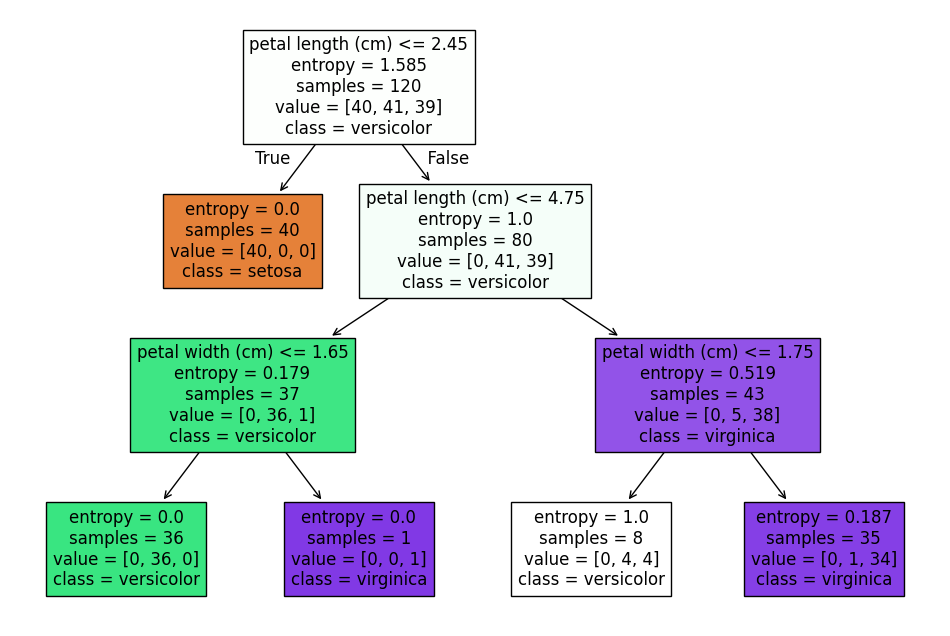

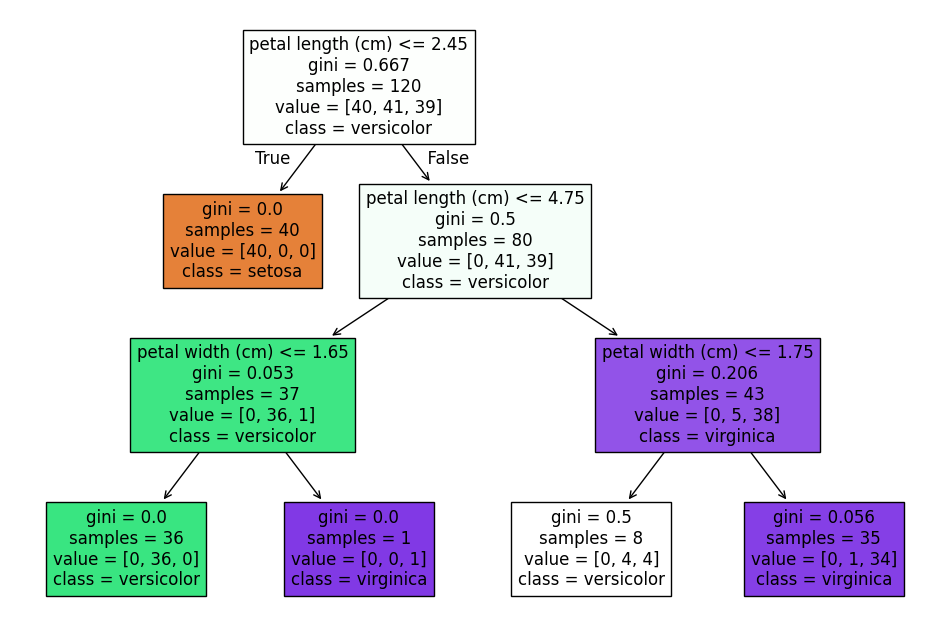

Gini Impurity Accuracy: 1.00
Entropy Accuracy: 1.00


In [4]:
# Create a decision tree using Gini impurity
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

# Compare with entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(clf_entropy, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

plt.figure(figsize=(12,8))
plot_tree(clf_gini,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          impurity=True)
plt.show()

print(f"Gini Impurity Accuracy: {clf_gini.score(X_test, y_test):.2f}")
print(f"Entropy Accuracy: {clf_entropy.score(X_test, y_test):.2f}")

### Another example

In [6]:
import numpy as np
from sklearn.datasets import load_iris
import math

def entropy(labels):
    """Calculate entropy of given labels."""
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -sum(p * math.log2(p) for p in probabilities if p > 0)

def gini_impurity(labels):
    """Calculate Gini impurity of given labels."""
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return 1 - sum(p**2 for p in probabilities)

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Example 1: Calculate entropy and Gini impurity for the entire dataset
print("Example 1: Entire Iris dataset")
print(f"Entropy: {entropy(y):.4f}")
print(f"Gini Impurity: {gini_impurity(y):.4f}")

# Example 2: Calculate for a subset (first 50 samples, which are all setosa)
print("\nExample 2: First 50 samples (all setosa)")
print(f"Entropy: {entropy(y[:50]):.4f}")
print(f"Gini Impurity: {gini_impurity(y[:50]):.4f}")

# Example 3: Calculate for a mixed subset
print("\nExample 3: 25 samples each of two classes")
mixed_subset = np.concatenate([y[50:75], y[100:125]])  # 25 versicolor, 25 virginica
print(f"Entropy: {entropy(mixed_subset):.4f}")
print(f"Gini Impurity: {gini_impurity(mixed_subset):.4f}")

# Example 4: Information Gain calculation
def information_gain(parent, left_child, right_child, impurity_func):
    """Calculate information gain after a split."""
    n = len(parent)
    n_left, n_right = len(left_child), len(right_child)
    
    parent_impurity = impurity_func(parent)
    left_impurity = impurity_func(left_child)
    right_impurity = impurity_func(right_child)
    
    weighted_child_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity
    return parent_impurity - weighted_child_impurity

# Let's split the dataset based on petal length > 2.45
petal_length = X[:, 2]
left_indices = petal_length <= 2.45
right_indices = petal_length > 2.45

parent_set = y
left_child = y[left_indices]
right_child = y[right_indices]

print("\nExample 4: Information Gain after splitting on petal length > 2.45")
print(f"Entropy-based Information Gain: {information_gain(parent_set, left_child, right_child, entropy):.4f}")
print(f"Gini-based Information Gain: {information_gain(parent_set, left_child, right_child, gini_impurity):.4f}")

Example 1: Entire Iris dataset
Entropy: 1.5850
Gini Impurity: 0.6667

Example 2: First 50 samples (all setosa)
Entropy: -0.0000
Gini Impurity: 0.0000

Example 3: 25 samples each of two classes
Entropy: 1.0000
Gini Impurity: 0.5000

Example 4: Information Gain after splitting on petal length > 2.45
Entropy-based Information Gain: 0.9183
Gini-based Information Gain: 0.3333


## Ensembling

Bagging использует метод бутстрепа для создания нескольких обучающих наборов данных и обучает на них несколько моделей, после чего усредняет их предсказания.
$$
[ \hat{f}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat{f}^{(b)}(x) ]
$$
где ( B ) — количество моделей, $$(\hat{f}^{(b)}(x))$$ — предсказание ( b )-й модели.

Random Forest
Random Forest — это расширение Bagging, которое добавляет случайность в процесс выбора признаков для каждой модели.
$$
[ \hat{f}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat{f}^{(b)}(x) ]
$$
где ( B ) — количество деревьев, $$(\hat{f}^{(b)}(x))$$ — предсказание ( b )-го дерева, обученного на случайном подмножестве признаков.

### Bagging, Random Forest

1. Constructing a Random Forest

2. Training the Random Forest

3. Validating the Random Forest
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



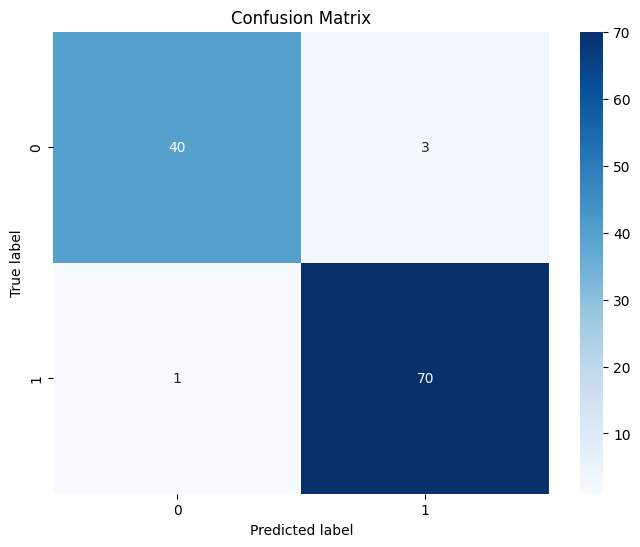


4. Cross-Validation
Cross-validation scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]
Mean CV score: 0.9561

5. Feature Importance


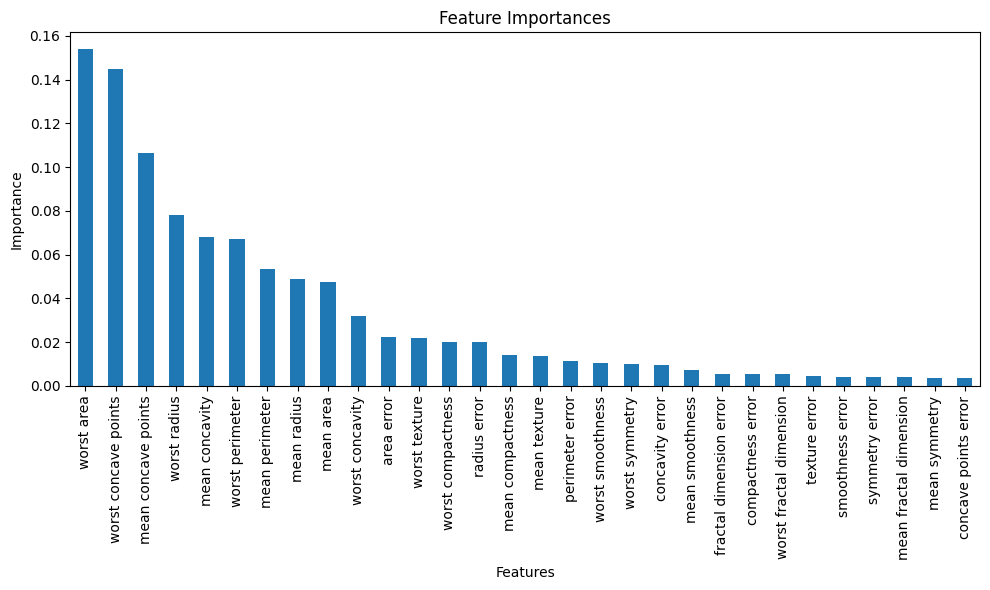


6. Hyperparameter Tuning


/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}

Best model accuracy: 0.9649

Best model classification report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


7. Learning Curves


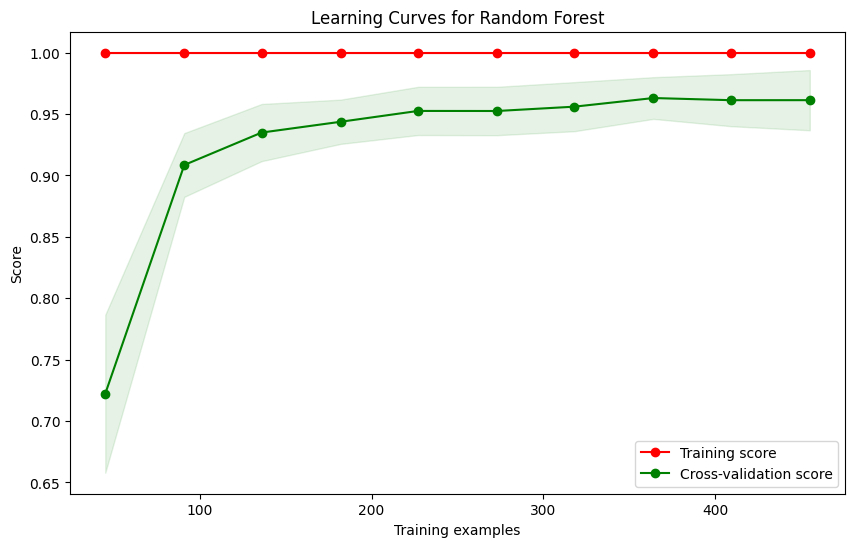

Learning curves have been plotted. Please check the visualization.


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Constructing a Random Forest
print("1. Constructing a Random Forest")

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Training the Random Forest
print("\n2. Training the Random Forest")

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# 3. Validating the Random Forest
print("\n3. Validating the Random Forest")

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# 4. Cross-Validation
print("\n4. Cross-Validation")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

# 5. Feature Importance
print("\n5. Feature Importance")

# Get feature importances
importances = rf_clf.feature_importances_
feature_importances = pd.Series(importances, index=cancer.feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# 6. Hyperparameter Tuning
print("\n6. Hyperparameter Tuning")

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random search object
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Fit the random search object to the data
random_search.fit(X_train, y_train)

print("Best parameters found:")
print(random_search.best_params_)

# Create a new random forest with the best parameters
best_rf = random_search.best_estimator_

# Train and evaluate the tuned model
best_rf.fit(X_train, y_train)
best_pred = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)

print(f"\nBest model accuracy: {best_accuracy:.4f}")
print("\nBest model classification report:")
print(classification_report(y_test, best_pred))

# 7. Learning Curves
print("\n7. Learning Curves")

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curves for Random Forest")
plt.legend(loc="best")
plt.show()

print("Learning curves have been plotted. Please check the visualization.")



# Key insights from this process:

# Model Performance: The accuracy and classification report give us a clear picture of how well the model is performing on unseen data.
# Feature Importance: This can provide valuable insights into which characteristics of breast cancer cells are most predictive of malignancy.
# Hyperparameter Tuning: This process often leads to improved model performance by finding the best combination of hyperparameters.
# Learning Curves: These help us understand if we would benefit from more training data or if we're already at peak performance given our model complexity.
# Cross-Validation: This gives us a more robust estimate of our model's performance than a single train-test split.

# Random Forests are often a good choice for many problems because:

# They're less prone to overfitting compared to individual decision trees.
# They can handle both numerical and categorical features.
# They provide feature importance, which aids in model interpretability.
# They generally perform well out-of-the-box, even before hyperparameter tuning.

In [5]:
print(train_sizes, train_scores, test_scores)

[ 45  91 136 182 227 273 318 364 409 455] [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] [[0.8245614  0.71929825 0.75438596 0.64035088 0.67256637]
 [0.87719298 0.93859649 0.93859649 0.90350877 0.88495575]
 [0.89473684 0.94736842 0.96491228 0.93859649 0.92920354]
 [0.92105263 0.94736842 0.97368421 0.92982456 0.94690265]
 [0.92105263 0.94736842 0.97368421 0.94736842 0.97345133]
 [0.92105263 0.97368421 0.97368421 0.94736842 0.94690265]
 [0.92105263 0.96491228 0.98245614 0.95614035 0.95575221]
 [0.93859649 0.95614035 0.99122807 0.96491228 0.96460177]
 [0.92982456 0.94736842 0.99122807 0.97368421 0.96460177]
 [0.92105263 0.94736842 0.99122807 0.97368421 0.97345133]]


### Boosting, Ada Boost

AdaBoost обучает последовательность слабых моделей, каждая из которых пытается исправить ошибки предыдущих моделей.

$$
[ \hat{f}(x) = \text{sign} \left( \sum_{m=1}^{M} \alpha_m \hat{f}_m(x) \right) ]
$$

где ( M ) — количество слабых моделей, $$(\alpha_m)$$ — вес ( m )-й модели, $$(\hat{f}_m(x))$$ — предсказание ( m )-й модели.

AdaBoost Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


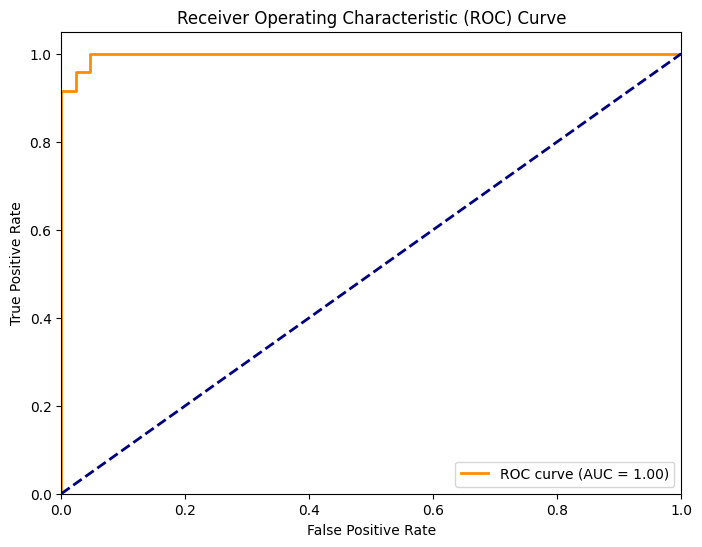

/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr


Cross-validation scores: [0.93859649 0.96491228 0.99122807 0.99122807 0.96460177]
Mean CV score: 0.9701 (+/- 0.0394)


/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

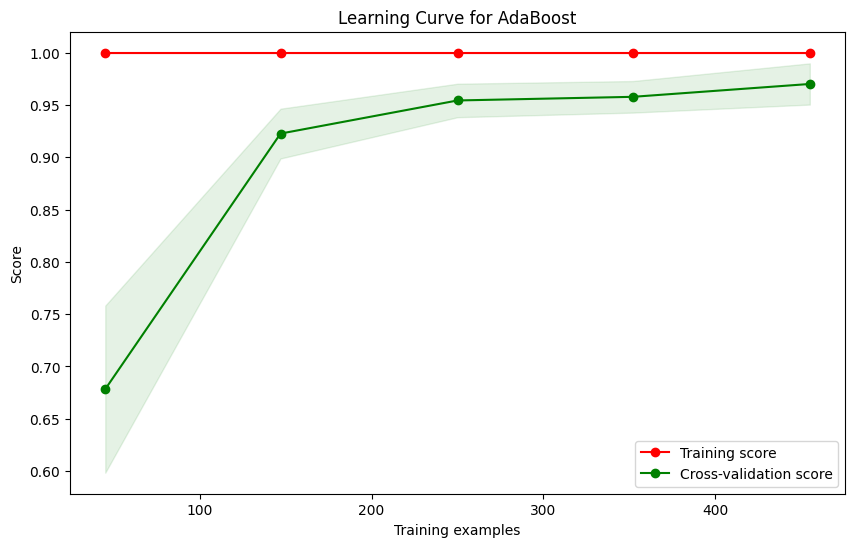


Feature importance ranking:
1. worst area (0.100000)
2. worst smoothness (0.080000)
3. worst texture (0.080000)
4. worst concave points (0.060000)
5. worst concavity (0.060000)
6. worst symmetry (0.060000)
7. mean texture (0.060000)
8. compactness error (0.060000)
9. worst perimeter (0.040000)
10. fractal dimension error (0.040000)
11. area error (0.040000)
12. mean symmetry (0.040000)
13. mean compactness (0.040000)
14. mean smoothness (0.040000)
15. radius error (0.040000)
16. mean fractal dimension (0.020000)
17. mean concave points (0.020000)
18. symmetry error (0.020000)
19. worst fractal dimension (0.020000)
20. concave points error (0.020000)
21. smoothness error (0.020000)
22. perimeter error (0.020000)
23. mean concavity (0.020000)
24. concavity error (0.000000)
25. worst compactness (0.000000)
26. worst radius (0.000000)
27. texture error (0.000000)
28. mean area (0.000000)
29. mean perimeter (0.000000)
30. mean radius (0.000000)


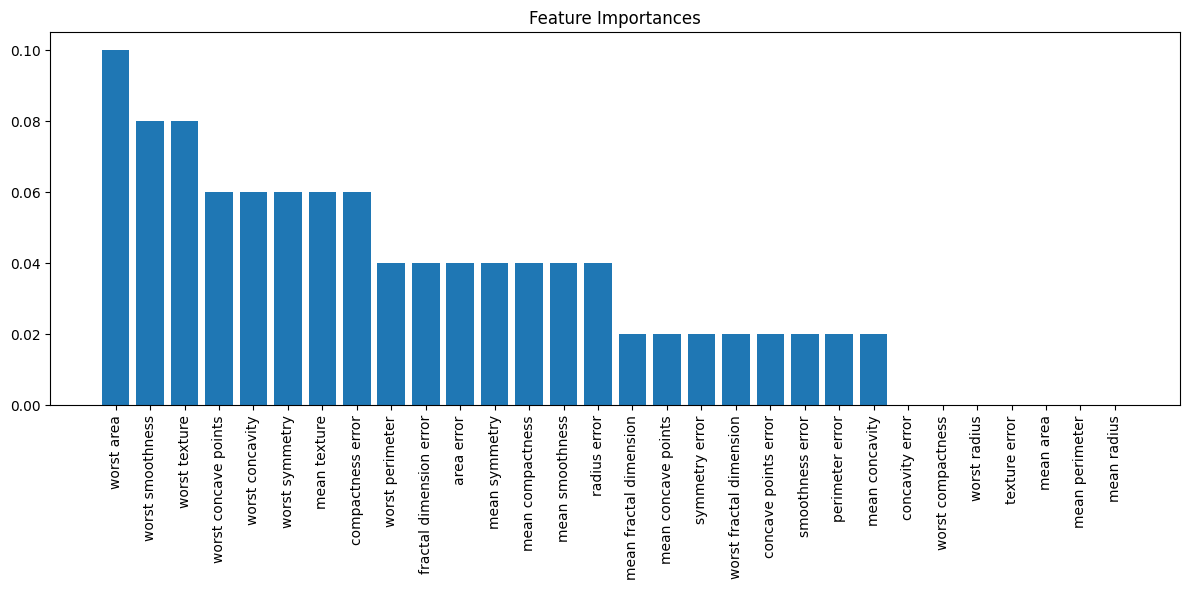


Analyzing individual weak learners:

Weak Learner 1:
Weight: 1.0000
Error: 0.0791

Weak Learner 2:
Weight: 1.0000
Error: 0.1566

Weak Learner 3:
Weight: 1.0000
Error: 0.1771

Weak Learner 4:
Weight: 1.0000
Error: 0.2522

Weak Learner 5:
Weight: 1.0000
Error: 0.2849


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Construct the AdaBoost model
# We'll use decision stumps (decision trees with max_depth=1) as weak learners
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Step 2: Train the AdaBoost model
adaboost.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = adaboost.predict(X_test)
y_pred_proba = adaboost.predict_proba(X_test)[:, 1]

# Step 4: Validate the model

# 4.1 Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4.2 ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 4.3 Cross-validation
cv_scores = cross_val_score(adaboost, X, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# 4.4 Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    adaboost, X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for AdaBoost")
plt.legend(loc="best")
plt.show()

# 4.5 Feature Importance
feature_importance = adaboost.feature_importances_
feature_names = cancer.feature_names

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\nFeature importance ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importance[indices])
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# 4.6 Analyzing individual weak learners
print("\nAnalyzing individual weak learners:")
for i, estimator in enumerate(adaboost.estimators_[:5], 1):  # Let's look at the first 5
    print(f"\nWeak Learner {i}:")
    print(f"Weight: {adaboost.estimator_weights_[i-1]:.4f}")
    print(f"Error: {adaboost.estimator_errors_[i-1]:.4f}")
    
    
# Key Insights:
# Model Performance: The accuracy, classification report, and ROC curve will give you a comprehensive view of how well AdaBoost is performing on the breast cancer dataset.
# Generalization: The cross-validation scores help you understand how well the model generalizes to unseen data.
# Learning Behavior: The learning curve shows how the model's performance improves with more data. If the training and cross-validation scores converge, it suggests the model is learning well.
# Important Features: The feature importance plot reveals which characteristics of the cells are most predictive of breast cancer, according to the model.
# Ensemble Dynamics: By looking at individual weak learners, you can see how AdaBoost combines many weak predictions into a strong one.

### Boosting, Gradient Boosting

Gradient Boosting обучает последовательность моделей, каждая из которых пытается минимизировать ошибку предыдущих моделей.
$$
[ \hat{f}(x) = \sum_{m=1}^{M} \gamma_m h_m(x) ]
$$
где ( M ) — количество моделей, (\gamma_m) — вес ( m )-й модели, (h_m(x)) — предсказание ( m )-й модели, обученной на остатках предыдущих моделей.



Step 1: Constructing the Gradient Boosting Classifier
Default parameters:
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Step 2: Training the model

Step 3: Making predictions and validating
Accuracy: 0.9561

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 2 69]]

Step 4: H

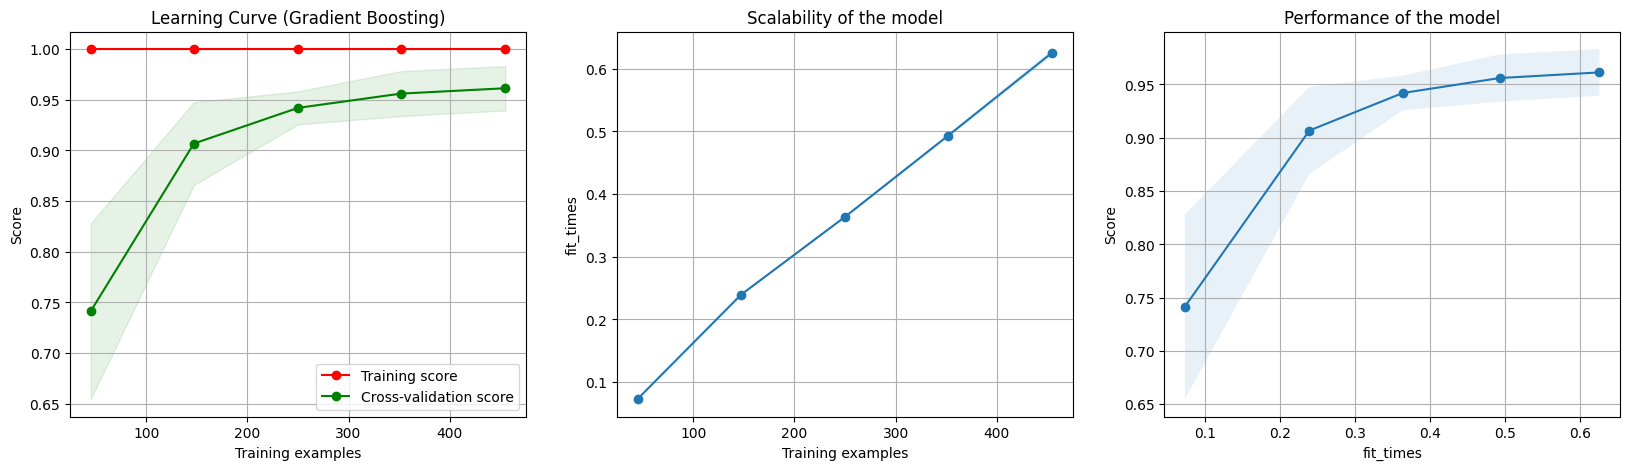


Step 6: Feature Importance


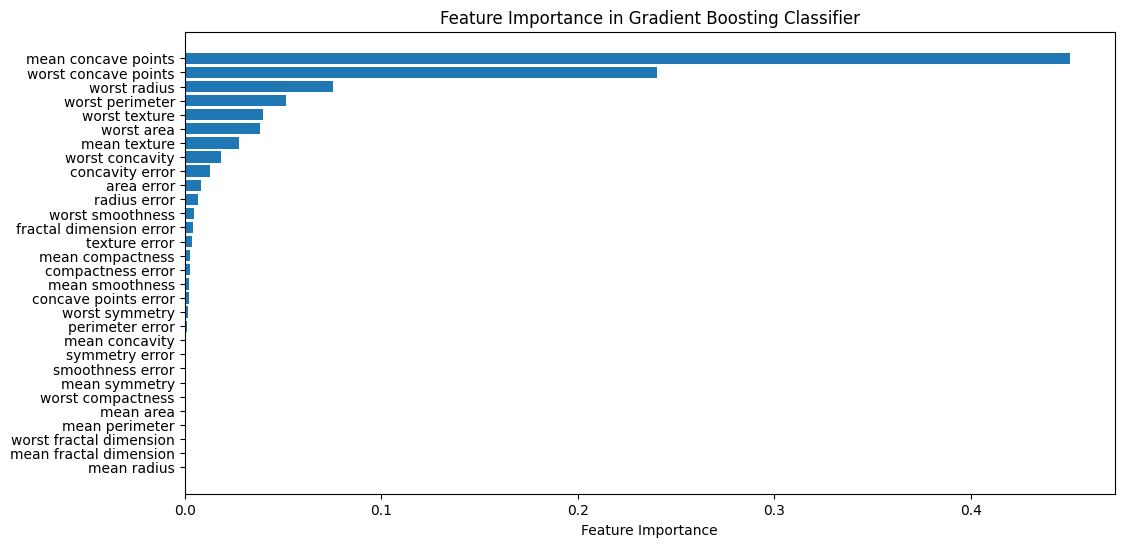

Feature importance plot has been generated. Please check the visualization.


In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Construct the Gradient Boosting Classifier
print("Step 1: Constructing the Gradient Boosting Classifier")
gb_clf = GradientBoostingClassifier(random_state=42)

# Display default parameters
print("Default parameters:")
print(gb_clf.get_params())

# Step 2: Train the model
print("\nStep 2: Training the model")
gb_clf.fit(X_train, y_train)

# Step 3: Make predictions and validate
print("\nStep 3: Making predictions and validating")
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 4: Hyperparameter Tuning
print("\nStep 4: Hyperparameter Tuning")
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model for prediction
best_gb_clf = grid_search.best_estimator_
y_pred_best = best_gb_clf.predict(X_test)

print("\nBest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Step 5: Learning Curve
print("\nStep 5: Plotting Learning Curve")

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_learning_curve(best_gb_clf, "Learning Curve (Gradient Boosting)", X, y, axes=axes, cv=5)
plt.show()

# Step 6: Feature Importance
print("\nStep 6: Feature Importance")
feature_importance = best_gb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, cancer.feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()

print("Feature importance plot has been generated. Please check the visualization.")

# Key takeaways:

# Model Performance: The accuracy and classification report show how well our model performs in predicting breast cancer. A high accuracy and balanced precision/recall indicate a good model.
# Hyperparameter Tuning: The best parameters found by grid search can significantly improve model performance. They provide a balance between model complexity and generalization ability.
# Learning Curve: This helps us understand if we have enough data. If the validation score is still increasing with more data, we might benefit from collecting more samples.
# Feature Importance: This can provide valuable insights for domain experts, highlighting which features are most crucial for prediction.
# Overfitting vs Underfitting: By comparing training and validation scores, we can assess if our model is overfitting (high training score, lower validation score) or underfitting (both scores low).

### Comparison Study 1

Example 1: Basic Bagging with Decision Trees
Decision Tree Accuracy: 0.7950
Bagging Classifier Accuracy: 0.8250

Example 2: Bagging vs Random Forest
Decision Tree Accuracy: 0.9474
Bagging Accuracy: 0.9561
Random Forest Accuracy: 0.9649

Example 3: Effect of number of estimators in Bagging


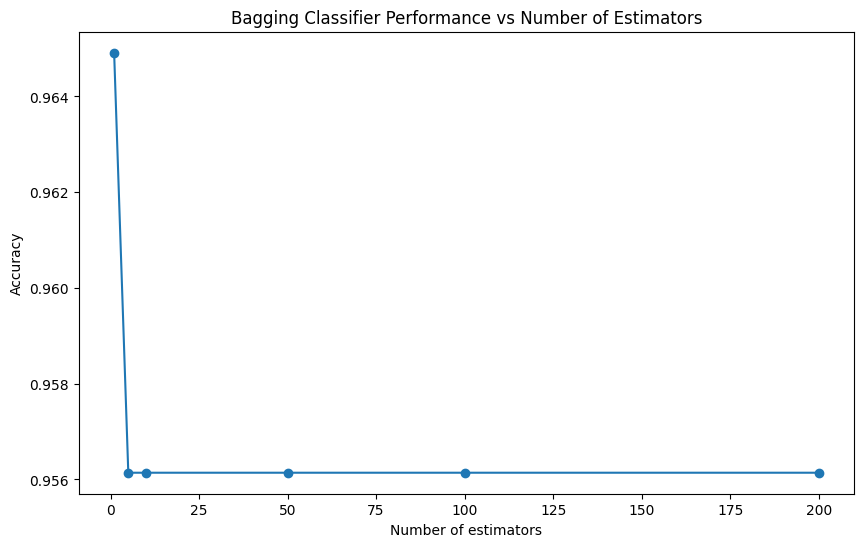


Example 4: Learning Curves


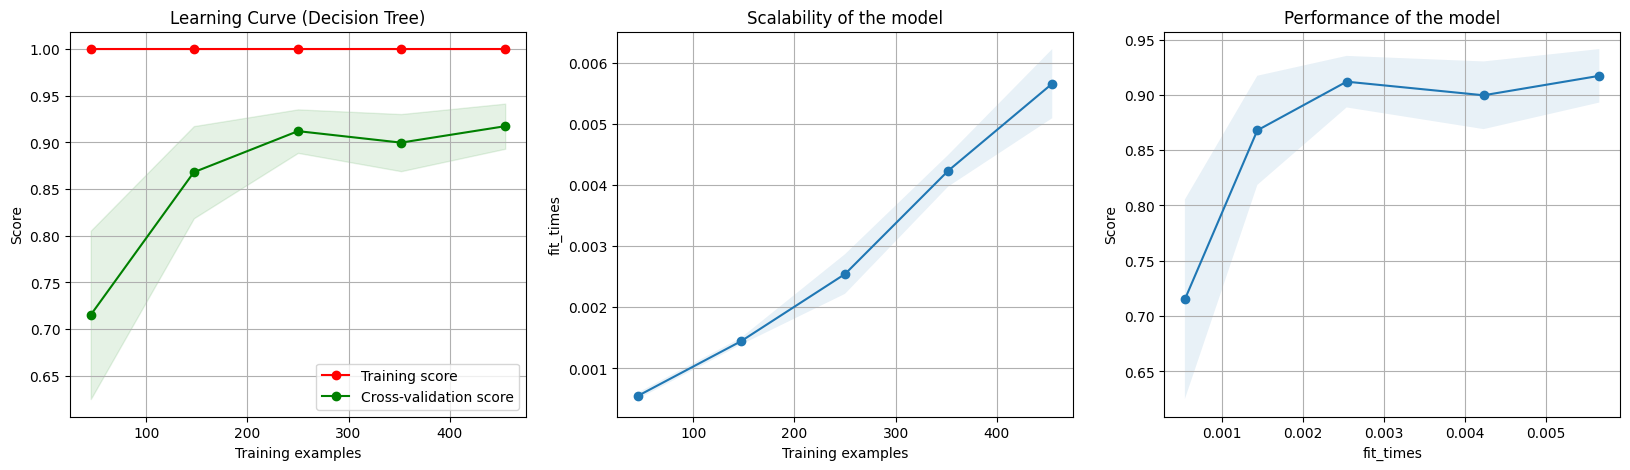

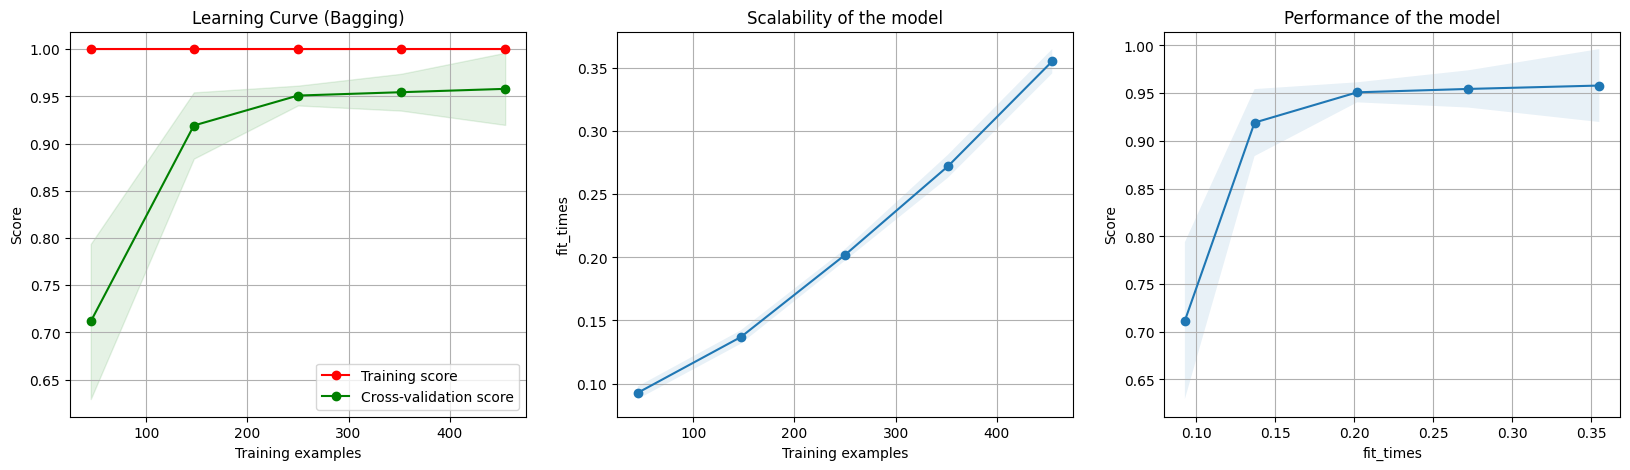

Learning curves have been plotted. Please check the visualizations.


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Helper function to plot learning curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Example 1: Basic Bagging with Decision Trees
print("Example 1: Basic Bagging with Decision Trees")

# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Create a bagging classifier
bagging_clf = BaggingClassifier(estimator=dt, n_estimators=10, random_state=42)

# Train the models
dt.fit(X_train, y_train)
bagging_clf.fit(X_train, y_train)

# Make predictions
dt_pred = dt.predict(X_test)
bagging_pred = bagging_clf.predict(X_test)

# Calculate accuracies
dt_accuracy = accuracy_score(y_test, dt_pred)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

# Example 2: Bagging vs Random Forest
print("\nExample 2: Bagging vs Random Forest")

# Load breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create classifiers
dt = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=dt, n_estimators=100, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate classifiers
classifiers = [dt, bagging_clf, rf_clf]
clf_names = ['Decision Tree', 'Bagging', 'Random Forest']

for clf, name in zip(classifiers, clf_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Example 3: Effect of number of estimators in Bagging
print("\nExample 3: Effect of number of estimators in Bagging")

n_estimators_range = [1, 5, 10, 50, 100, 200]
bagging_scores = []

for n_estimators in n_estimators_range:
    bagging_clf = BaggingClassifier(estimator=dt, n_estimators=n_estimators, random_state=42)
    bagging_clf.fit(X_train, y_train)
    score = bagging_clf.score(X_test, y_test)
    bagging_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, bagging_scores, marker='o')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Bagging Classifier Performance vs Number of Estimators')
plt.show()

# Example 4: Learning Curves
print("\nExample 4: Learning Curves")

dt = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=dt, n_estimators=100, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_learning_curve(dt, "Learning Curve (Decision Tree)", X, y, axes=axes, cv=5)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_learning_curve(bagging_clf, "Learning Curve (Bagging)", X, y, axes=axes, cv=5)
plt.show()

print("Learning curves have been plotted. Please check the visualizations.")

### Comparison Study 2


Example 1: AdaBoost vs Decision Tree
Decision Tree Accuracy: 0.8947
AdaBoost Accuracy: 0.9737

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Example 2: Comparing Different Ensemble Methods


/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9737

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Gradient Boosting Accuracy: 0.9561

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Random Forest Accuracy: 0.9649

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.9

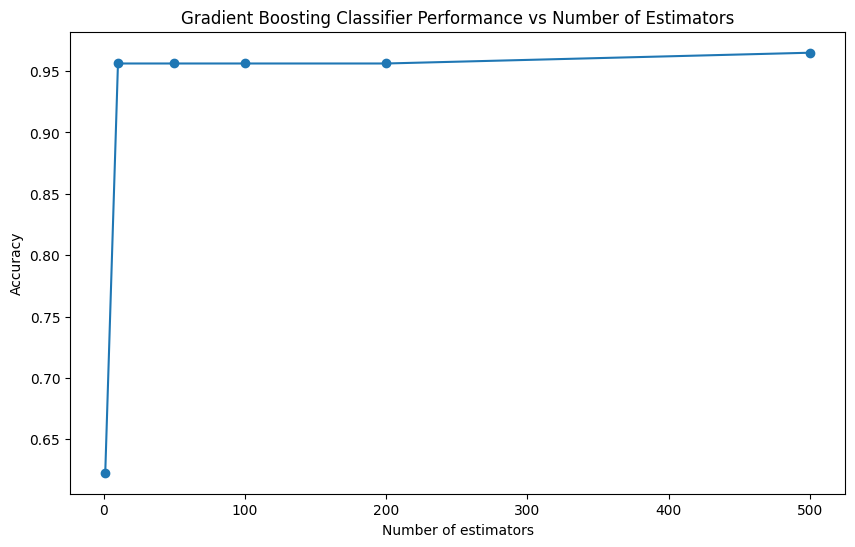


Example 4: Learning Curves


/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/beybars/Desktop/beybars/outpeer/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

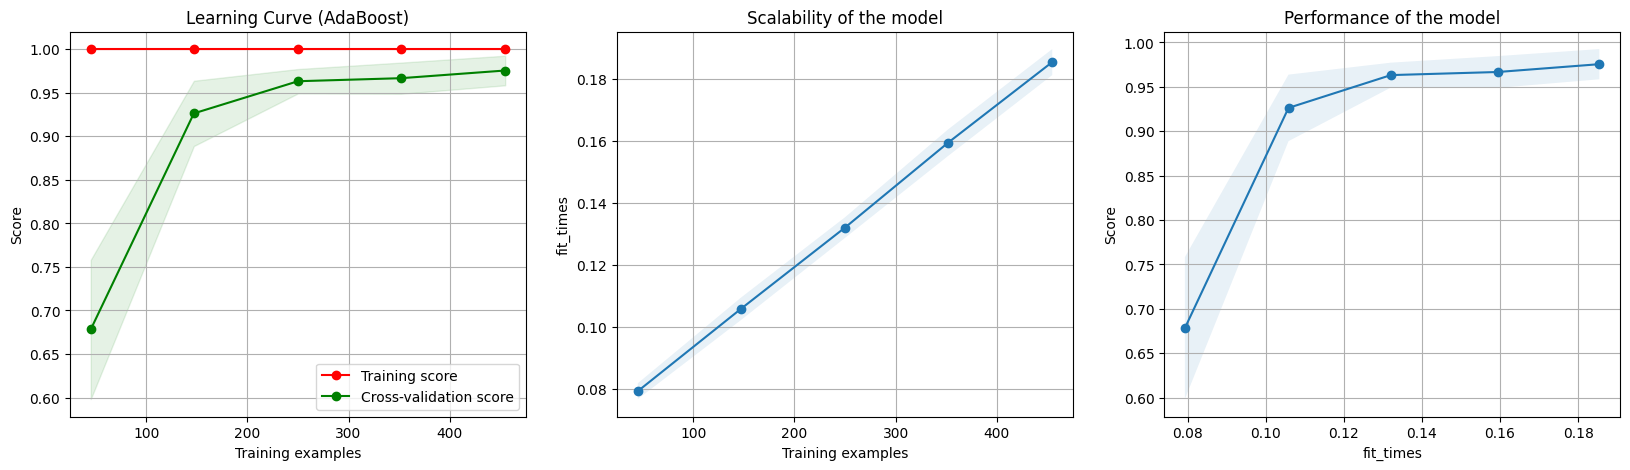

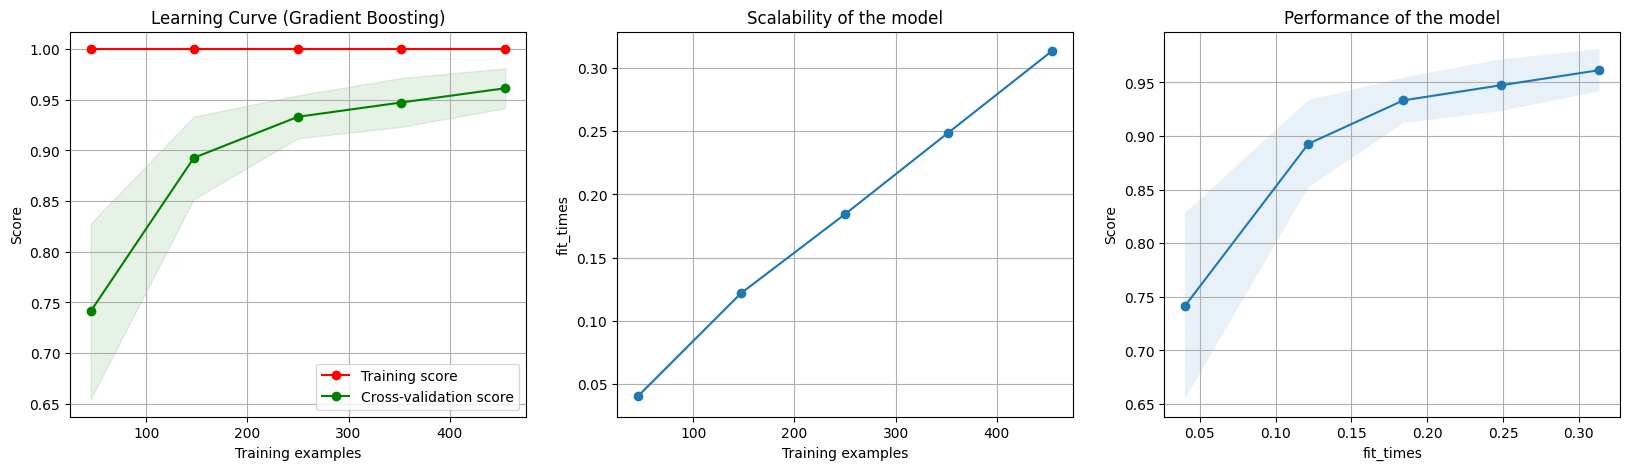

Learning curves have been plotted. Please check the visualizations.

Example 5: Feature Importance in Gradient Boosting


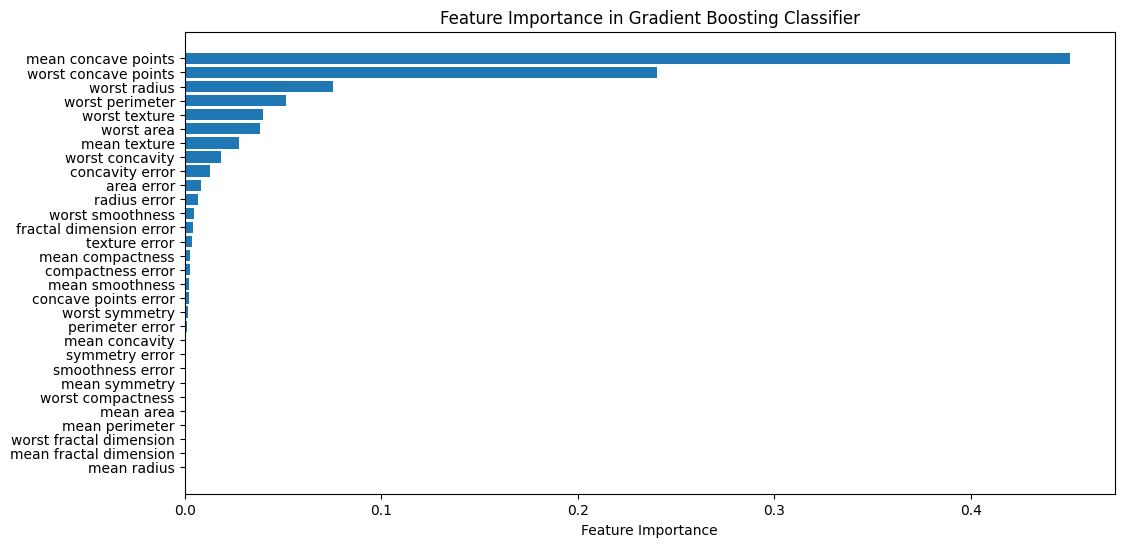

Feature importance plot has been generated. Please check the visualization.


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Load breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to plot learning curves
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Example 1: AdaBoost vs Decision Tree
print("Example 1: AdaBoost vs Decision Tree")

dt = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_clf = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=42)

dt.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
ada_pred = ada_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

print("\nAdaBoost Classification Report:")
print(classification_report(y_test, ada_pred))

# Example 2: Comparing Different Ensemble Methods
print("\nExample 2: Comparing Different Ensemble Methods")

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

classifiers = [ada_clf, gb_clf, rf_clf]
clf_names = ['AdaBoost', 'Gradient Boosting', 'Random Forest']

for clf, name in zip(classifiers, clf_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Example 3: Effect of number of estimators in Gradient Boosting
print("\nExample 3: Effect of number of estimators in Gradient Boosting")

n_estimators_range = [1, 10, 50, 100, 200, 500]
gb_scores = []

for n_estimators in n_estimators_range:
    gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb_clf.fit(X_train, y_train)
    score = gb_clf.score(X_test, y_test)
    gb_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, gb_scores, marker='o')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Classifier Performance vs Number of Estimators')
plt.show()

# Example 4: Learning Curves for AdaBoost and Gradient Boosting
print("\nExample 4: Learning Curves")

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_learning_curve(ada_clf, "Learning Curve (AdaBoost)", X, y, axes=axes, cv=5)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_learning_curve(gb_clf, "Learning Curve (Gradient Boosting)", X, y, axes=axes, cv=5)
plt.show()

print("Learning curves have been plotted. Please check the visualizations.")

# Example 5: Feature Importance in Gradient Boosting
print("\nExample 5: Feature Importance in Gradient Boosting")

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

feature_importance = gb_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, cancer.feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.show()

print("Feature importance plot has been generated. Please check the visualization.")

## SVM

Математическое выражение для SVM:

$$
\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \xi_i
$$

при условиях:

$$
y_i (\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i = 1, \ldots, n
$$

где:
- $\mathbf{w}$ - вектор весов,
- $b$ - смещение,
- $\xi_i$ - переменные для штрафов,
- $C$ - параметр регуляризации,
- $y_i$ - метки классов,
- $\mathbf{x}_i$ - векторы признаков.

Ядра для SVM

Линейное ядро
Линейное ядро вычисляется как скалярное произведение двух векторов признаков:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j
$$

Полиномиальное ядро
Полиномиальное ядро вычисляется как возведение в степень скалярного произведения двух векторов признаков:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i \cdot \mathbf{x}_j + c)^d
$$
где:
- $c$ - константа,
- $d$ - степень полинома.

RBF (радиально-базисная функция) ядро
RBF ядро вычисляется как экспонента от отрицательной евклидовой дистанции между двумя векторами признаков:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
$$
где:
- $\gamma$ - параметр ядра.

Cигмоидное ядро
Сигмоидное ядро вычисляется как гиперболический тангенс от скалярного произведения двух векторов признаков:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\alpha \mathbf{x}_i \cdot \mathbf{x}_j + c)
$$
где:
- $\alpha$ - параметр ядра,
- $c$ - константа.

Kernel: linear, C: 0.1
  Accuracy: 0.8500
  Precision: 0.8000
  Recall: 0.8333

Kernel: linear, C: 1
  Accuracy: 0.8333
  Precision: 0.7917
  Recall: 0.7917

Kernel: linear, C: 10
  Accuracy: 0.8333
  Precision: 0.7917
  Recall: 0.7917

Kernel: poly, C: 0.1
  Accuracy: 0.8500
  Precision: 0.7419
  Recall: 0.9583

Kernel: poly, C: 1
  Accuracy: 0.8667
  Precision: 0.8077
  Recall: 0.8750

Kernel: poly, C: 10
  Accuracy: 0.8333
  Precision: 0.7917
  Recall: 0.7917

Kernel: rbf, C: 0.1
  Accuracy: 0.8833
  Precision: 0.8696
  Recall: 0.8333

Kernel: rbf, C: 1
  Accuracy: 0.9500
  Precision: 0.9200
  Recall: 0.9583

Kernel: rbf, C: 10
  Accuracy: 0.9667
  Precision: 0.9583
  Recall: 0.9583



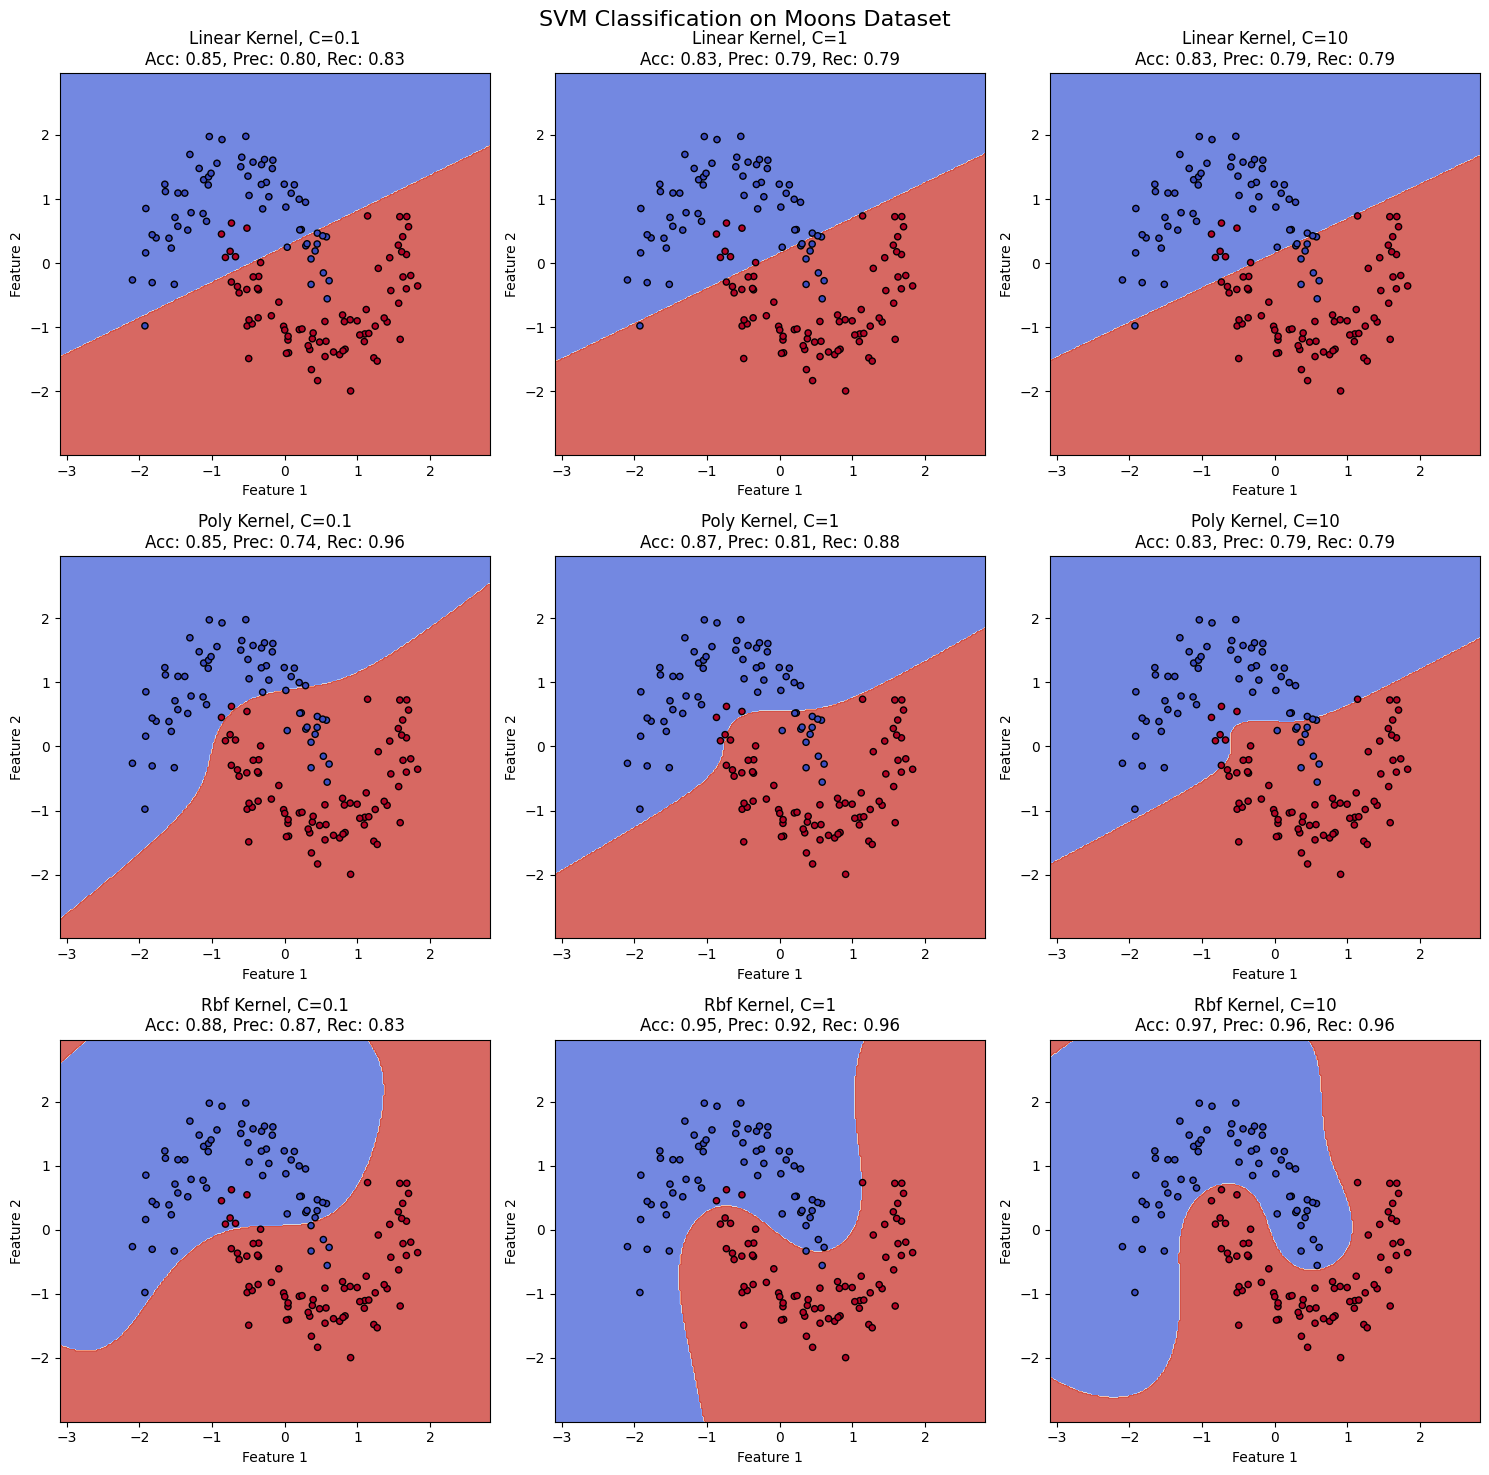

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Generate sample data
np.random.seed(0)
X, y = datasets.make_moons(n_samples=200, noise=0.15)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        clf = svm.SVC(kernel=kernel, C=C)
        clf.fit(X_train_scaled, y_train)
        
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        X0, X1 = X_train_scaled[:, 0], X_train_scaled[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        
        ax = axs[i, j]
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f"{kernel.capitalize()} Kernel, C={C}\nAcc: {accuracy:.2f}, Prec: {precision:.2f}, Rec: {recall:.2f}")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        
        print(f"Kernel: {kernel}, C: {C}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print()

plt.suptitle("SVM Classification on Moons Dataset", fontsize=16)
plt.tight_layout()
plt.show()

# Kernel Trick: Compare the linear kernel plots with the polynomial and RBF kernel plots. 
# You'll see how the non-linear kernels can create curved decision boundaries that better separate the classes in this non-linearly separable dataset.

# Soft Margin Classification (C parameter):
# For each kernel, observe how the decision boundary changes as C increases from 0.1 to 10.
# Lower C values generally result in smoother, simpler boundaries that might misclassify some points.
# Higher C values can lead to more complex boundaries that try to correctly classify more training points, but might overfit.

# Metrics Interpretation:
# Accuracy: Proportion of correct predictions (both true positives and true negatives) among the total number of cases examined.
# Precision: Proportion of true positive predictions among all positive predictions. (TP / (TP + FP))
# Recall: Proportion of true positive predictions among all actual positive samples. (TP / (TP + FN))

# Look at how these metrics change with different kernels and C values. 
# A good model should balance all three metrics, but the importance of precision vs. recall may depend on the specific problem context.

In [18]:
X_train.shape

(140, 2)

Kernel: linear, C: 0.1
  Accuracy: 0.9825
  Precision: 0.9817
  Recall: 0.9907

Kernel: linear, C: 1
  Accuracy: 0.9766
  Precision: 0.9815
  Recall: 0.9815

Kernel: linear, C: 10
  Accuracy: 0.9649
  Precision: 0.9811
  Recall: 0.9630

Kernel: poly, C: 0.1
  Accuracy: 0.8480
  Precision: 0.8060
  Recall: 1.0000

Kernel: poly, C: 1
  Accuracy: 0.8947
  Precision: 0.8571
  Recall: 1.0000

Kernel: poly, C: 10
  Accuracy: 0.9708
  Precision: 0.9558
  Recall: 1.0000

Kernel: rbf, C: 0.1
  Accuracy: 0.9357
  Precision: 0.9369
  Recall: 0.9630

Kernel: rbf, C: 1
  Accuracy: 0.9766
  Precision: 0.9815
  Recall: 0.9815

Kernel: rbf, C: 10
  Accuracy: 0.9766
  Precision: 0.9815
  Recall: 0.9815



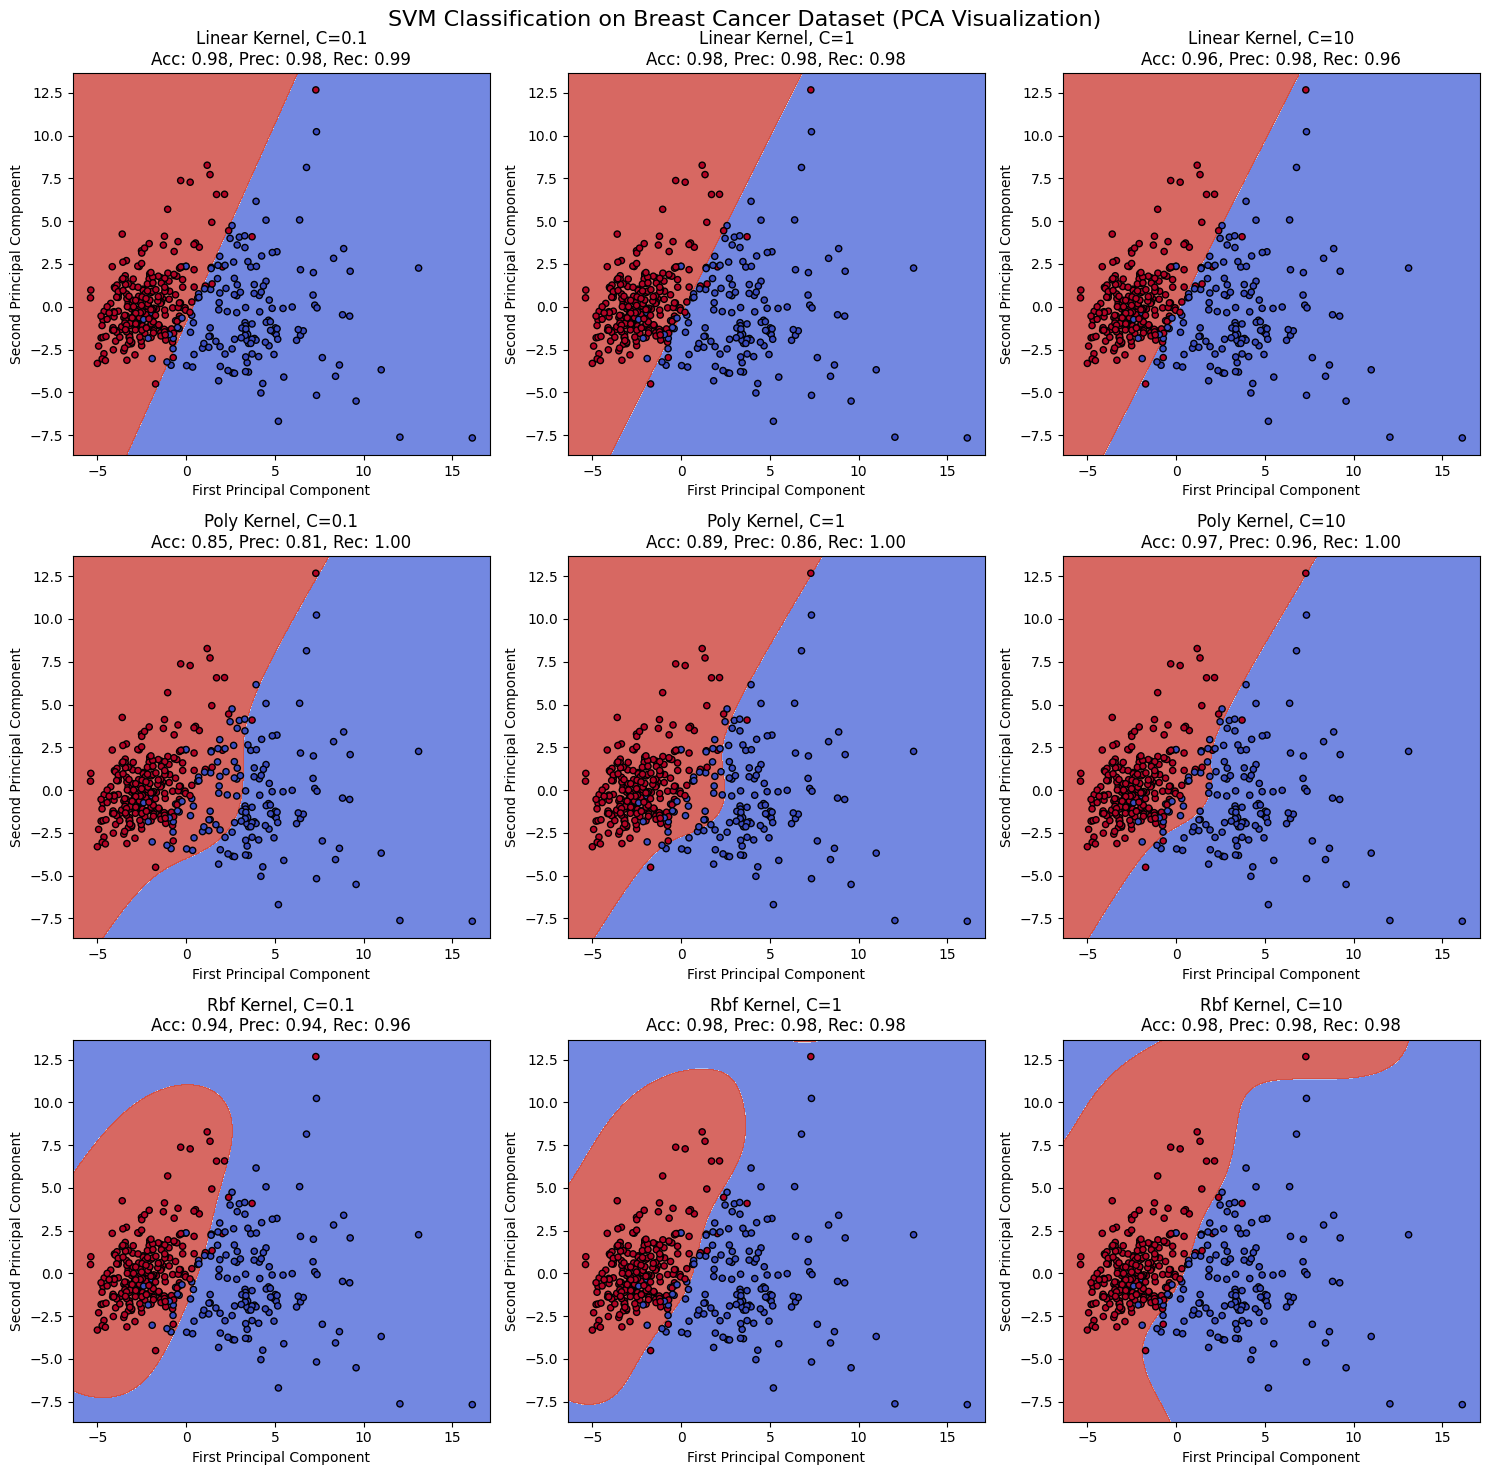

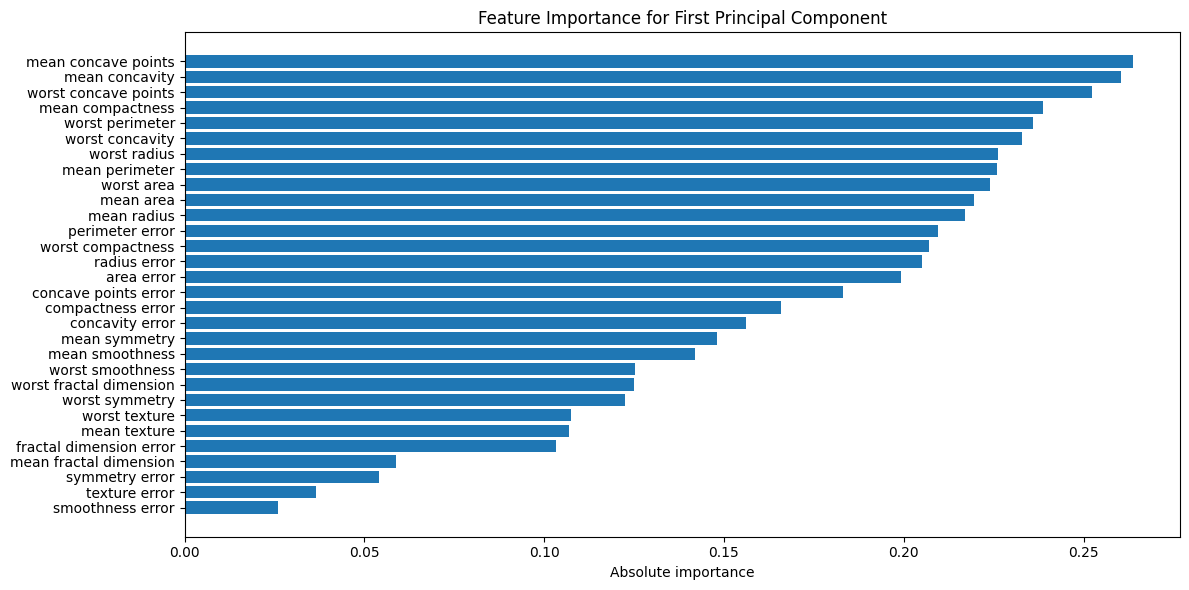

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create and train SVM classifiers with different kernels
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        clf = svm.SVC(kernel=kernel, C=C)
        clf.fit(X_train_scaled, y_train)
        
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        
        # Train a separate classifier on PCA data for visualization
        clf_pca = svm.SVC(kernel=kernel, C=C)
        clf_pca.fit(X_train_pca, y_train)
        
        X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        
        ax = axs[i, j]
        plot_contours(ax, clf_pca, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_title(f"{kernel.capitalize()} Kernel, C={C}\nAcc: {accuracy:.2f}, Prec: {precision:.2f}, Rec: {recall:.2f}")
        ax.set_xlabel('First Principal Component')
        ax.set_ylabel('Second Principal Component')
        
        print(f"Kernel: {kernel}, C: {C}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print()

plt.suptitle("SVM Classification on Breast Cancer Dataset (PCA Visualization)", fontsize=16)
plt.tight_layout()
plt.show()

# Feature importance analysis
feature_importance = np.abs(pca.components_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(cancer.feature_names)[sorted_idx])
ax.set_xlabel('Absolute importance')
ax.set_title('Feature Importance for First Principal Component')
plt.tight_layout()
plt.show()


# Key observations:
# Performance:
# Notice how the accuracy varies with different kernels and C values.
# The breast cancer dataset is often well-separated, so you might see high accuracy across many configurations.

# Decision Boundaries:
# Observe how the decision boundaries change with different kernels and C values.
# The RBF kernel might provide more flexible boundaries compared to the linear kernel.

# C Parameter Effect:
# As C increases, you might see more complex decision boundaries as the model tries to fit the training data more closely.

# Feature Importance:
# The bar plot shows which original features contribute most to the first principal component.
# This can give insights into which features are most important for classification in this dataset.

In [15]:
X_train_scaled.shape

(398, 30)